In [ ]:
import pandas as pd

df = pd.read_csv("/Users/dannytran/Documents/VSCode Projekte/virality-prediction/data/Cleaned_Viral_Social_Media_Trends.csv") 
print('This gives me the shape')
print(df.shape)
print('This gives me the columns')
print(df.columns)
print('This gives me the head')
print (df.head())

This gives me the shape
(5000, 11)
This gives me the columns
Index(['Post_ID', 'Post_Date', 'Platform', 'Hashtag', 'Content_Type', 'Region',
       'Views', 'Likes', 'Shares', 'Comments', 'Engagement_Level'],
      dtype='object')
This gives me the head
  Post_ID   Post_Date   Platform     Hashtag Content_Type     Region    Views  \
0  Post_1  2022-01-13     TikTok  #Challenge        Video         UK  4163464   
1  Post_2  2022-05-13  Instagram  #Education       Shorts      India  4155940   
2  Post_3  2022-01-07    Twitter  #Challenge        Video     Brazil  3666211   
3  Post_4  2022-12-05    YouTube  #Education       Shorts  Australia   917951   
4  Post_5  2023-03-23     TikTok      #Dance         Post     Brazil    64866   

    Likes  Shares  Comments Engagement_Level  
0  339431   53135     19346             High  
1  215240   65860     27239           Medium  
2  327143   39423     36223           Medium  
3  127125   11687     36806              Low  
4  171361   69581      6

Wie viele Posts pro Plattform?

In [14]:
print(df["Platform"].value_counts())

Platform
YouTube      1324
TikTok       1260
Instagram    1212
Twitter      1204
Name: count, dtype: int64


Verteilung der Likes/Views (normal oder heavy-tailed)?

count      5000.0
mean     251475.0
std      144349.6
min         490.0
25%      126892.2
50%      249443.0
75%      373970.8
max      499922.0
Name: Likes, dtype: float64
Der Median ist 249443.0


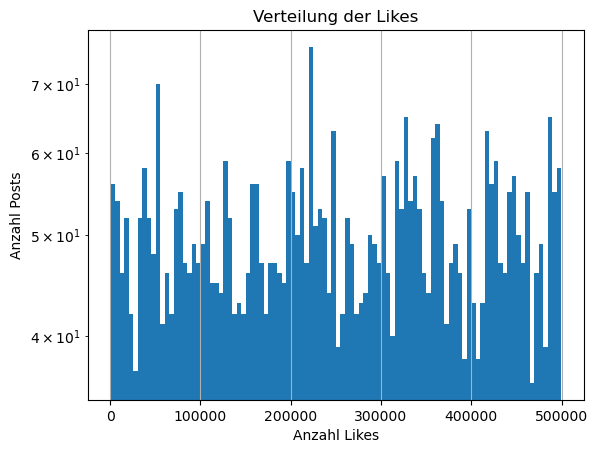

count       5000.0
mean     2494066.4
std      1459489.8
min         1266.0
25%      1186207.2
50%      2497373.0
75%      3759781.0
max      4999430.0
Name: Views, dtype: float64
Der Median ist 2497373.0


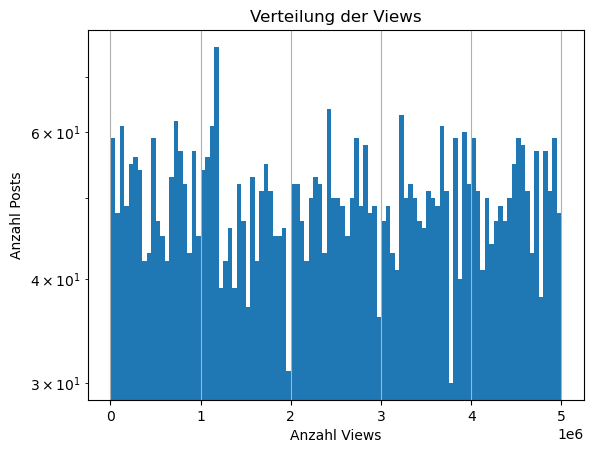

In [41]:
print(df["Likes"].describe().round(1)) 
print("Der Median ist " + str(df["Likes"].median()))
import matplotlib.pyplot as plt

df["Likes"].hist(bins=100, log=True)
plt.xlabel("Anzahl Likes")
plt.ylabel("Anzahl Posts")
plt.title("Verteilung der Likes")
plt.show()

print(df["Views"].describe().round(1))
print("Der Median ist " + str(df["Views"].median()))
import matplotlib.pyplot as plt

df["Views"].hist(bins=100, log=True)
plt.xlabel("Anzahl Views")
plt.ylabel("Anzahl Posts")
plt.title("Verteilung der Views")
plt.show()